# SA2-INDIVIDUAL ASSIGNMENT:

**Linear Regression Analysis on Wages vs IQ**

## INSTRUCTIONS:
Data file name - Wage2.csv

We want to analyse the relationship between the wages and IQ of the employees of a firm. We have a random sample of 935 employees. The variable wage contains the wages of the employees in thousands of rupees. The variable IQ contains their IQ scores. The variable educ contains their number of years of education. One model that explains the relationship between wages and IQ is:

$wage = \beta_{0}+\beta_{1}IQ+\epsilon$ **---> Equation(1)**

where $\beta_{1}$ is the causal effect of IQ on wage.

## QUESTIONS:

1. What kind of factors might be contained in ε? Are these likely to be correlated with IQ?
2. Will a simple regression of wage on IQ uncover the causal effect of IQ on wage? Explain.
3. What are the average values of wage and IQ in the sample? What are their minimum and maximum values?
4. How would you characterize the relationship between wage and IQ in terms of (a) direction, (b) linearity, and (c) strength?
5. What is the correlation coefficient between wage and IQ? Is this what you expected based on your characterization in part 4?
6. Estimate the model in (1) using OLS.\
(a) Interpret the estimated intercept $\hat{\beta_{0}}$.\
(b) Interpret the estimated coefficient $\hat{\beta_{1}}$. Does it have the sign that you would expect?
7. In terms of the model parameters, state the null hypothesis that IQ is not (linearly) associated with wage. State the alternative hypothesis that a higher IQ is associated with a higher wage.
8. Can you reject the null hypothesis in part 7 against the alternative hypothesis in part 7 at the 5% significance level?\
Suppose that instead of (1), we estimate the model\
$wage = \beta_{0}+\beta_{1}IQ+\beta_{2}educ+\epsilon$
9. What are the average, minimum, and maximum values of educ in the sample? 10. Estimate the model in (2) using OLS.\
(a) Interpret the estimated intercept $\hat{\beta_{0}}$. Does the intercept make sense?\
(b) Interpret the estimated coefficients $\hat{\beta_{1}}$ and $\hat{\beta_{2}}$.
11. Regress educ on IQ and verify the omitted variable bias formula\
$\bar{\beta_{1}} = \hat{\beta_{1}}+\hat{\beta_{2}}\bar{\delta_{1}}$\
where all notation is as in the lecture slides.
12. What is the predicted wage of the first individual in the sample according to the estimate of model in (2)? Is this individual overpaid or underpaid?

## ASSUMPTIONS:
For majority of the assignment, we assume (unless specified):

1. That the give data is only a smaple of the entire population and the sample distribution is approximately normal with sufficiently large sample size ($n\geq30$)- Per Central Limit Theorem (CLT).
2. Zero Conditional Mean (ZCM) in which case the linear model will be deterministic where wage is calculated based on IQ (sometimes both IQ and educ) and all other factors that could possibly influence the wage in real will be considered zero. This would reduce Equation1 as below:

$wage = \beta_{0}+\beta_{1}IQ$ **----> Equation(2)**

### Import Python libraries

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

### Read the data file - Wage2.csv

In [15]:
# Read data file
data = pd.read_csv('Wage2.csv')

### Table1. Correlation Coefficients

In [16]:
# Calculate the correlation coefficient
cormat = data.corr()
round(cormat,2)

,wage,IQ,educ
wage,1.00,0.31,0.33
IQ,0.31,1.00,0.52
educ,0.33,0.52,1.00


### 1)

From Equation(1), it can be said that the given data is synonymus to simple linear regression model:

$y = \beta_{0} + \beta_{1}x + \epsilon$

where, y is wage (response variable), x is IQ (explanatory variable) and $\epsilon$ is the random error term. The coefficients $\beta_{0}$ and $\beta_{1}$ are intercept and slope respectively.

Although the equation seems deterministic based on IQ, other factors such as education years also play an important role in determining the wage of a person. 

In general sense, a person with good IQ can be attributed to have got higher years of education compared with less or no years of education. Or this could be a completely FALSE statement based on co-relation between IQ and years of education which will be esitmated in the later part of this assignment - Question(11).

Other than education, wage also can be influenced by other measurable (eg. years of experience) and non-measurable or difficult to measure (eg. effort, performance) parameters too. All this would become part of the error term ($\epsilon$) that results in a stochastic relation.


### 2)

Forming a simple linear regression relation between wage and IQ is always possible mathematically. At the outset, based on the value of the corrlation coefficient ($-1 \leq r \leq 1$):
- if it is zero, there exists no linear relation
- if it gets close to -1, stronger the negative linear relation
- if it gets close to 1, stronger the positive linear relation.  

From **Table1**, r = 0.31. This implies that there is a positive linear correlation between IQ and wage.

Using regression analysis, we assume that IQ influences wage and use information on IQ to predict/describe variations in wage. So by intution it appears like the regression models talk about causality. However, causality can only be accurately determined by random experiments and other advanced methods. otherwise, it is not easy to determine if we are actually trying to fit a model with data that is part of spurious-correlation.

For example, see the chart below (source: www.tylervigen.com/spurious-correlations) which shows (visual but generated mathematically) there exists relation between -"Percapita consumption of Mozzerella cheese vs Civil engineering doctorates awarded". This absolutely does not make sense as one cannot get a Civil engineering doctorate by consuming mozzerella chese. However, mathematically there exists a linear positive correlation.

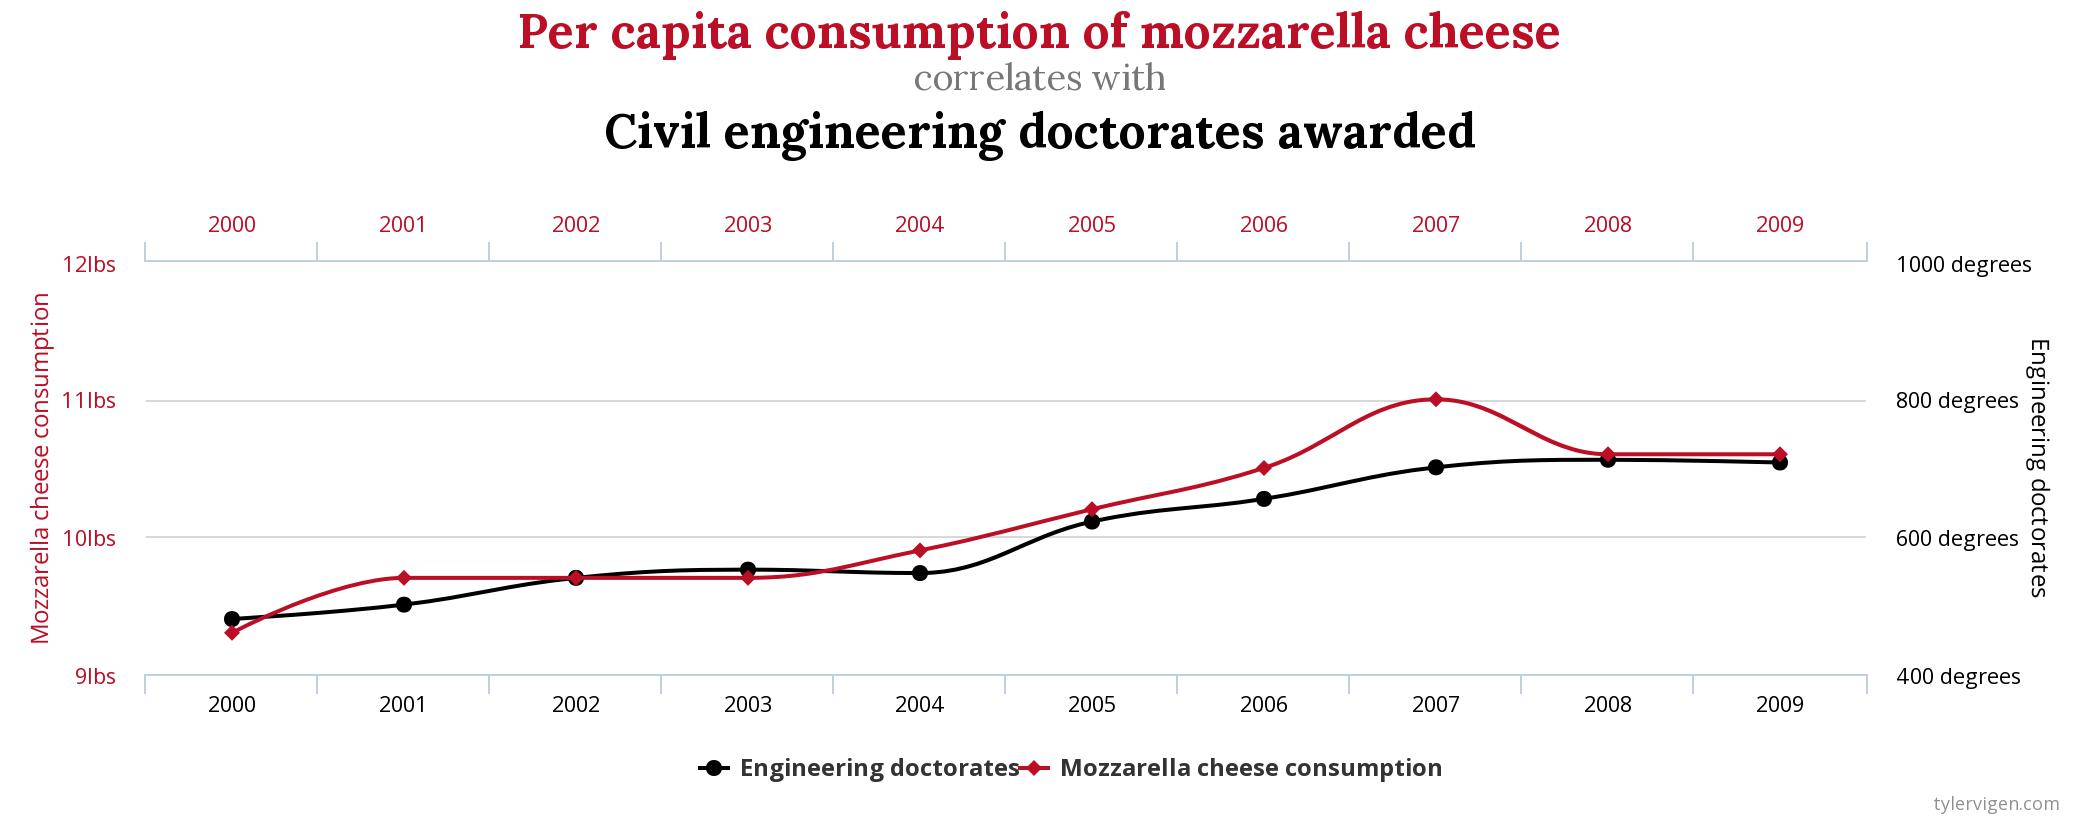

Hence, in the current scenario, although the calculations show a positive linear relationship between wage and IQ, this may not necessarily imply causality.

### Table2. Sample Data Summary

In [4]:
data.describe()

,wage,IQ,educ
count,935.000000,935.000000,935.000000
mean,957.945455,101.282353,13.468449
std,404.360822,15.052636,2.196654
min,115.000000,50.000000,9.000000
25%,669.000000,92.000000,12.000000
50%,905.000000,102.000000,12.000000
75%,1160.000000,112.000000,16.000000
max,3078.000000,145.000000,18.000000


### 3)

From **Table2**:

Average values:
- wage = 957.95
- IQ = 101.28

Minimum values:
- wage = 115
- IQ = 50

Maximum values:
- wage = 3078
- IQ = 145

### Figure1. Scatter Plot with Line-Fit

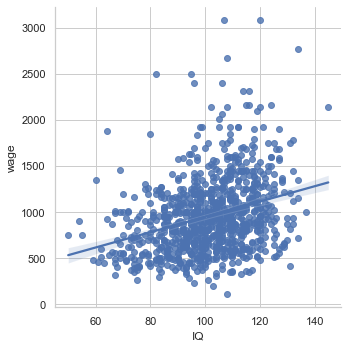

In [19]:
sns.lmplot(x='IQ', y='wage', data=data)

### 4)

From the visual inspection of the scatter plot (Figure1) and Correlation coefficient (Table1), following can be inferenced:
1. Direction - two variables have positive relationship; one increases, the other also tend to increase.
2. Linearity - two variables exhibit linearity
3. Strength - two variables are weakly correlated interms of linearity. 

From the above details, it can be interpreted that the relation between IQ and wage although seems linear, there are certainly other factors that are influencing the wage which in this case could be education years.

### 5)

From Table1, Correlation coefficient between wage and IQ is: r = 0.31.\
This is in line with the scatter plot (point#4) and our general belief that wage of a person is influenced by many other factors (like education, experience and so on) other than IQ.

### Table3. Simple Linear Model estimation using OLS:

In [22]:
import statsmodels.api as sm
Y = data['wage']
X = data['IQ']
X = sm.add_constant(X)
model = sm.OLS(Y, X, missing='drop')
model_result = model.fit()
model_result.summary()

/Users/prm/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     98.55
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           3.79e-22
Time:                        18:34:51   Log-Likelihood:                -6891.4
No. Observations:                 935   AIC:                         1.379e+04
Df Residuals:                     933   BIC:                         1.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        116.9916     85.642      1.366      0.172     -51.081     285.064
IQ             8.3031      0.836      9.927      0.000       6.662       9.944
==============================================================================
Omnibus:                      208.281   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              532.184
Skew:                           1.157   Prob(JB):                    2.74e-116
Kurtosis:                       5.882   Cond. No.                         697.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 6)

From **Table3**, model (from Equation(2) above) is estimated as:\

$wage = 116.99 + 8.3IQ$ **---> Equation(3)**

where,
- $\hat{\beta_{0}} = 116.99$
- $\hat{\beta_{1}} = 8.3$

### a)

Estimated intercept coefficient ($\hat{\beta_{0}}$), says that a person with zero IQ has a predicted wage of 116.99K. In this case, this interpretation does makes sense that a person without any IQ can also earn. This interpretation is only valid for this sample data set and any values outside of this explanatory set will still make prediction but is not valid, unless the underlying assumption says that the wage and IQ shares same linear relationship with values outside the given set.

### b)

Estimated slope coefficient ($\hat{\beta_{1}}$), shows a positive relation between wage (as expected) and IQ. If median IQ increases by 1, then the predicted wage will also increase by 8.3 times.

### 7)

From the information given in the question, hypothesis test can be constructed as below:

- $H_{0}: \beta_{1} = 0$
- $H_{A}: \beta_{1} \neq 0$

Meaning, we accept the null hypothesis if the slope intercept is equal to zero - which means there is no linear relation between wage and IQ. Given this, the corresponding alternat hypothesis can only imply a linear relationship which could be either positive or negative. 
(If we need to set a alternative hypothesis which implies a positive linear relationship, then one has to set the null hypothesis as zero or less.)

### Table4. Hypothesis Testing on Slope Intercept

In [31]:
# Conduct the Hypothesis testing
hypothesis = 'IQ = 0'
T_test = model_result.t_test(hypothesis)
print(T_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             8.3031      0.836      9.927      0.000       6.662       9.944


### 8)

From **Table4**, since the p-value is zero, we reject the null hypothesis. At the 5% significance level, the confidence interval does not contain the value zero. Hence, it can be concluded that IQ is significant in explaining the wage and given the value of slope is positive, a higher IQ results in higher wage.

(similar results for hypothesis test are also represented in **Table3**)

### 9)

From **Table2**:

Average values:
- educ = 13.47

Minimum values:
- educ = 9

Maximum values:
- educ = 18

### Table5. Multiple Linear Model estimation using OLS

In [33]:
from statsmodels.formula.api import ols
formula = 'wage ~ IQ + educ'
results = ols(formula, data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     72.02
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           8.27e-30
Time:                        20:34:43   Log-Likelihood:                -6871.2
No. Observations:                 935   AIC:                         1.375e+04
Df Residuals:                     932   BIC:                         1.376e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -128.8899     92.182     -1.398      0.162    -309.799      52.019
IQ             5.1380      0.956      5.375      0.000       3.262       7.014
educ          42.0576      6.550      6.421      0.000      29.203      54.912
==============================================================================
Omnibus:                      201.903   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              551.331
Skew:                           1.097   Prob(JB):                    1.91e-120
Kurtosis:                       6.056   Cond. No.                         773.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 10)

From **Table5**, model is estimated as:

$wage = -128.89 + 5.14IQ + 42.06educ$ **---> Equation(4)**

where,
- $\hat{\beta_{0}} = -128.89$
- $\hat{\beta_{1}} = 5.14$
- $\hat{\beta_{2}} = 42.06$

### a)

Estimated intercept coefficient ($\hat{\beta_{0}}$), is negative. Which means if IQ and education years are zero a person would earn a wage of less than zero which is not practically possible and hence does not makes sense. However, it could also mean that with the addition of education years, the model is overestimating the prediction of wage and hence a correction is applied to bring it close to the average.

### b)

Estimated IQ slope coefficient ($\hat{\beta_{1}}$), shows a positive relation between wage (as expected) and IQ. If median IQ increases by 1, then the predicted wage will also increase by 5.14 times given the other independent variable 'educ' is kept constant. Similarly, estimated educ slope coefficient ($\hat{\beta_{2}}$), shows a positive relation between wage and education. An increase in educ by a factor of 1 would increase teh prediction of wage by 42.06 times while IQ is kept constant.

### Table6. Simple Linear Model estimation using OLS: educ on IQ

In [36]:
formula = 'educ ~ IQ'
results = ols(formula, data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   educ   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     338.0
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           1.16e-64
Time:                        23:16:02   Log-Likelihood:                -1917.5
No. Observations:                 935   AIC:                             3839.
Df Residuals:                     933   BIC:                             3849.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8463      0.419     13.949      0.000       5.024       6.669
IQ             0.0753      0.004     18.385      0.000       0.067       0.083
==============================================================================
Omnibus:                       38.893   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.385
Skew:                           0.481   Prob(JB):                     1.70e-09
Kurtosis:                       2.667   Cond. No.                         697.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 11)

From Equation(3), Equation(4) and Table6 following are available:
- $\tilde{\beta} = 8.3$
- $\hat{\beta_{1}} = 5.14$
- $\hat{\beta_{2}} = 42.06$
- $\tilde{\delta_{1}} = 0.0753$

OMB ($\tilde{\beta}$) is calculated as:

- $\tilde{\beta} \approx \hat{\beta_{1}} + \hat{\beta_{2}}*\tilde{\delta_{1}}$
- $8.3 \approx 5.14 + 42.06 * 0.0753$
- $8.3 \approx 8.31$

By omitting education years in Equation(3), the data was biased as education years has positive correlation with IQ (Table6) and also wage (Equation(4). Hence, from above analysis, a positive bias was observed which increased the predicted value of wage when IQ increased with zero effect of education years.

### 12)

First individual has IQ = 93 and educ = 12.

Using Equation(4):
- wage = -128.89 + 5.14 * 93 + 42.06 * 12
- wage = -128.89 + 478.02 + 504.72
- wage = 853.85K

From above analysis, multiple linear regression model predicts a wage higher than the actual wage which is 769K.
Hence the first individual according to multiple linear regression model is overpaid.